In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/2 Salary Data Simple SVR - Eka.csv')

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
# Pemisahan Data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
# Pembuatan Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  49830096.85590839


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Hitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

# Hitung R^2
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE) : ", mae)
print("Mean Absolute Percentage Error (MAPE) : ", mape)
print("R^2 Score : ", r2)

Root Mean Squared Error (RMSE) :  7059.04362190151
Mean Absolute Error (MAE) :  6286.453830757749
Mean Absolute Percentage Error (MAPE) :  7.744880046205216
R^2 Score :  0.9024461774180497


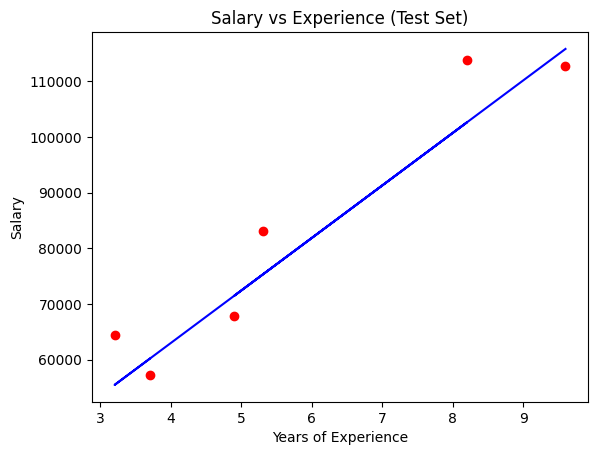

In [18]:
# Visualisasi Hasil
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

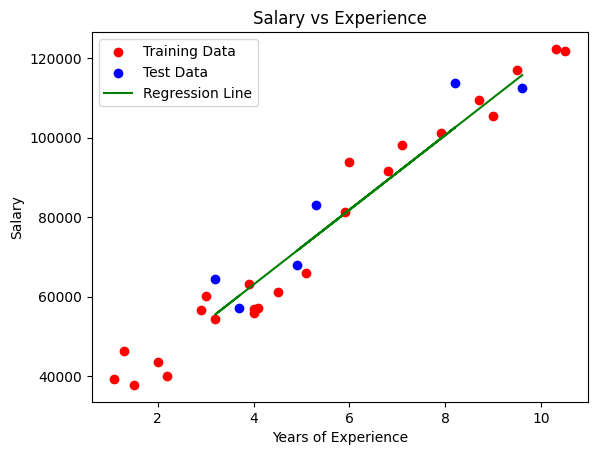

In [19]:
# Visualisasi Data Train
plt.scatter(X_train, y_train, color='red', label='Training Data')

# Visualisasi Data Test
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Visualisasi Garis Regresi
plt.plot(X_test, y_pred, color='green', label='Regression Line')

plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [16]:
# Buat Data Frame Untuk Data Test
df_test = pd.DataFrame(X_test, columns=['YearsExperience'])

# Tambahkan Kolom 'Actual' Untuk Nilai Aktual
df_test['Actual'] = y_test

# Tambahkan Kolom 'Predicted' Untuk Nilai Prediksi
df_test['Predicted'] = y_pred

df_test

,YearsExperience,Actual,Predicted
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


In [17]:
# Misalkan kita memiliki data bari dalam bentuk numpy array
new_data = np.array([[10]])

# Lakukan Prediksi Dengan Model
predicted_salary = model.predict(new_data)

print("Predicted Salary : ", predicted_salary)

Predicted Salary :  [119559.73624209]
